# Librerias

In [3]:
import pandas as pd



# Importamos el dataset

In [4]:
# Importamos el dataset
df = pd.read_csv("../data/hypertension_dataset.csv")

# Revisar las primeras filas
df.head()

,Country,Age,BMI,Cholesterol,Systolic_BP,Diastolic_BP,Smoking_Status,Alcohol_Intake,Physical_Activity_Level,Family_History,...,Sleep_Duration,Heart_Rate,LDL,HDL,Triglycerides,Glucose,Gender,Education_Level,Employment_Status,Hypertension
0,UK,58,29.5,230,160,79,Never,27.9,Low,Yes,...,6.1,80,100,75,72,179,Female,Primary,Unemployed,High
1,Spain,34,36.2,201,120,84,Never,27.5,High,Yes,...,9.8,56,77,47,90,113,Male,Secondary,Unemployed,High
2,Indonesia,73,18.2,173,156,60,Current,1.8,High,Yes,...,5.2,75,162,56,81,101,Male,Primary,Employed,Low
3,Canada,60,20.3,183,122,94,Never,11.6,Moderate,Yes,...,7.5,71,164,93,94,199,Female,Secondary,Retired,High
4,France,73,21.8,296,91,97,Never,29.1,Moderate,Yes,...,5.0,52,108,74,226,157,Female,Primary,Employed,High


# Exploramos los datos

In [5]:
# Informacion general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174982 entries, 0 to 174981
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Country                  174982 non-null  object 
 1   Age                      174982 non-null  int64  
 2   BMI                      174982 non-null  float64
 3   Cholesterol              174982 non-null  int64  
 4   Systolic_BP              174982 non-null  int64  
 5   Diastolic_BP             174982 non-null  int64  
 6   Smoking_Status           174982 non-null  object 
 7   Alcohol_Intake           174982 non-null  float64
 8   Physical_Activity_Level  174982 non-null  object 
 9   Family_History           174982 non-null  object 
 10  Diabetes                 174982 non-null  object 
 11  Stress_Level             174982 non-null  int64  
 12  Salt_Intake              174982 non-null  float64
 13  Sleep_Duration           174982 non-null  float64
 14  Hear

In [6]:
# Estadisticas descriptivas
df.describe()

,Age,BMI,Cholesterol,Systolic_BP,Diastolic_BP,Alcohol_Intake,Stress_Level,Salt_Intake,Sleep_Duration,Heart_Rate,LDL,HDL,Triglycerides,Glucose
count,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000
mean,53.493319,27.494672,224.539335,134.505229,89.450315,14.991069,5.013041,8.482757,6.996468,74.495085,129.528271,64.573105,149.569836,134.488187
std,20.786353,7.213866,43.361589,26.019268,17.310789,8.652624,2.582341,3.750074,1.730731,14.438573,34.635795,20.190666,57.765006,37.526882
min,18.000000,15.000000,150.000000,90.000000,60.000000,0.000000,1.000000,2.000000,4.000000,50.000000,70.000000,30.000000,50.000000,70.000000
25%,36.000000,21.200000,187.000000,112.000000,74.000000,7.500000,3.000000,5.200000,5.500000,62.000000,100.000000,47.000000,100.000000,102.000000
50%,54.000000,27.500000,225.000000,135.000000,89.000000,15.000000,5.000000,8.500000,7.000000,74.000000,130.000000,65.000000,150.000000,134.000000
75%,71.000000,33.700000,262.000000,157.000000,104.000000,22.500000,7.000000,11.700000,8.500000,87.000000,160.000000,82.000000,200.000000,167.000000
max,89.000000,40.000000,299.000000,179.000000,119.000000,30.000000,9.000000,15.000000,10.000000,99.000000,189.000000,99.000000,249.000000,199.000000


# Limpieza y Preparacion de Datos

In [7]:
# Verificar si hay valores nulos
df.isnull().sum()

Country                    0
Age                        0
BMI                        0
Cholesterol                0
Systolic_BP                0
Diastolic_BP               0
Smoking_Status             0
Alcohol_Intake             0
Physical_Activity_Level    0
Family_History             0
Diabetes                   0
Stress_Level               0
Salt_Intake                0
Sleep_Duration             0
Heart_Rate                 0
LDL                        0
HDL                        0
Triglycerides              0
Glucose                    0
Gender                     0
Education_Level            0
Employment_Status          0
Hypertension               0
dtype: int64

In [8]:
# Eliminamos columnas innecesarias
df.drop('Country', axis=1, inplace=True)

In [9]:
#Verificamos variables categóricas
print(df["Smoking_Status"].unique())
print(df["Physical_Activity_Level"].unique())
print(df["Gender"].unique())
print(df["Education_Level"].unique())
print(df["Employment_Status"].unique())
print(df["Hypertension"].unique())
print(df["Diabetes"].unique())
print(df["Family_History"].unique())

['Never' 'Current' 'Former']
['Low' 'High' 'Moderate']
['Female' 'Male']
['Primary' 'Secondary' 'Tertiary']
['Unemployed' 'Employed' 'Retired']
['High' 'Low']
['Yes' 'No']
['Yes' 'No']


In [10]:
# Convertir variables categóricas a numéricas
mapping_smoking_status = {'Never': 0, 'Current': 1, 'Former': 2}
mapping_physical_activity = {'Low': 0, 'High': 1, 'Moderate': 2}
mapping_gender = {'Female': 0, 'Male': 1}
mapping_education_level = {'Primary': 0, 'Secondary': 1, 'Tertiary': 2}
mapping_employment_status = {'Unemployed': 0, 'Employed': 1, 'Retired': 2}
mapping_diabetes = {'No': 0, 'Yes': 1}
mapping_family_History = {'No': 0, 'Yes': 1}
mapping_hypertension = {'Low': 0, 'High': 1}

df['Smoking_Status'] = df['Smoking_Status'].map(mapping_smoking_status)
df['Physical_Activity_Level'] = df['Physical_Activity_Level'].map(mapping_physical_activity)
df['Gender'] = df['Gender'].map(mapping_gender)
df['Education_Level'] = df['Education_Level'].map(mapping_education_level)
df['Employment_Status'] = df['Employment_Status'].map(mapping_employment_status)
df['Diabetes'] = df['Diabetes'].map(mapping_diabetes)
df['Family_History'] = df['Family_History'].map(mapping_family_History)


df['Hypertension'] = df['Hypertension'].map(mapping_hypertension)


In [11]:
df

,Age,BMI,Cholesterol,Systolic_BP,Diastolic_BP,Smoking_Status,Alcohol_Intake,Physical_Activity_Level,Family_History,Diabetes,...,Sleep_Duration,Heart_Rate,LDL,HDL,Triglycerides,Glucose,Gender,Education_Level,Employment_Status,Hypertension
0,58,29.5,230,160,79,0,27.9,0,1,1,...,6.1,80,100,75,72,179,0,0,0,1
1,34,36.2,201,120,84,0,27.5,1,1,1,...,9.8,56,77,47,90,113,1,1,0,1
2,73,18.2,173,156,60,1,1.8,1,1,1,...,5.2,75,162,56,81,101,1,0,1,0
3,60,20.3,183,122,94,0,11.6,2,1,1,...,7.5,71,164,93,94,199,0,1,2,1
4,73,21.8,296,91,97,0,29.1,2,1,0,...,5.0,52,108,74,226,157,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174977,51,39.4,266,174,82,0,10.3,0,1,1,...,9.5,96,172,72,100,95,0,2,1,0
174978,89,39.0,243,104,94,0,7.2,2,1,0,...,6.2,63,81,66,140,124,0,0,1,1
174979,43,36.5,266,109,98,2,22.9,0,1,0,...,10.0,62,139,39,93,71,1,1,1,1
174980,48,18.3,294,134,84,0,15.3,1,0,1,...,4.7,53,112,37,57,87,1,0,2,1


# Separacion de los datos 

In [13]:
from sklearn.model_selection import train_test_split

# Separacion de los datos
X = df.drop('Hypertension', axis=1)
y = df['Hypertension']

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Configuramos parametros del modelo
model = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=2,random_state=42,class_weight='balanced')
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7174329228219561
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      9889
           1       0.72      1.00      0.84     25108

    accuracy                           0.72     34997
   macro avg       0.36      0.50      0.42     34997
weighted avg       0.51      0.72      0.60     34997

[[    0  9889]
 [    0 25108]]


c:\Users\David\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\David\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\David\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# Visualizacion de los Datos

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns


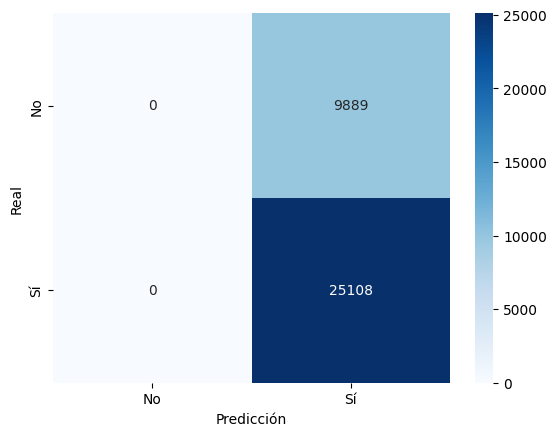

In [ ]:
#MATRIZ DE CONFUSION
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Sí'], yticklabels=['No', 'Sí'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


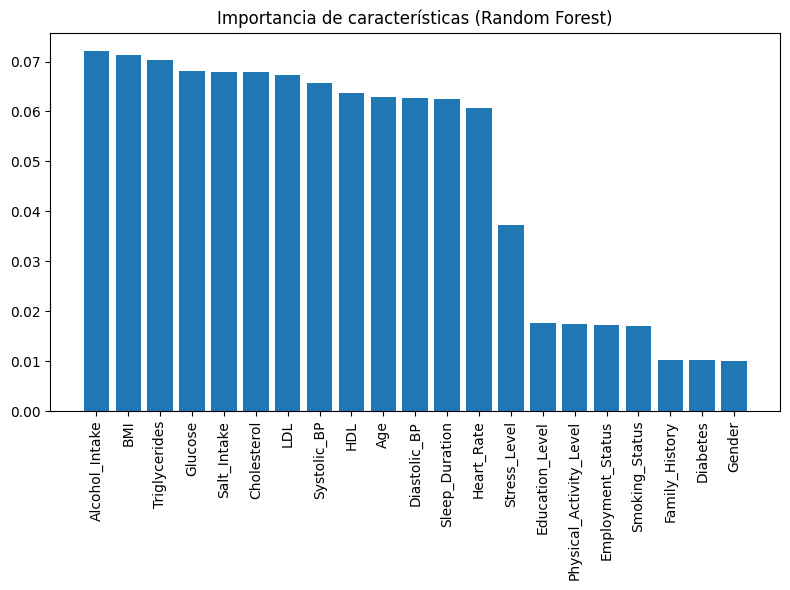

In [ ]:
# Visualizacion de las caracteristicas mas importantes
importances = model.feature_importances_
features = X.columns
indices = importances.argsort()[::-1] 

plt.figure(figsize=(8,6))
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), features[indices], rotation=90)
plt.title('Importancia de  cada caracteristica')
plt.tight_layout()
plt.show()


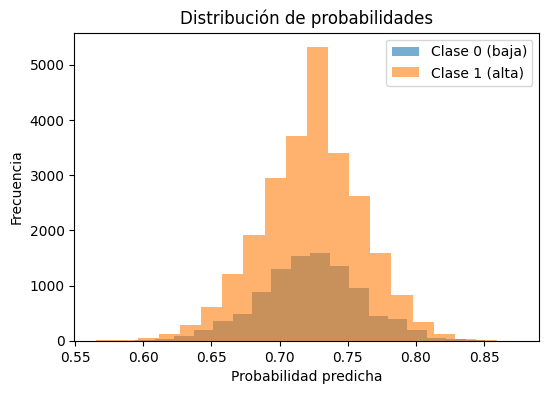

In [ ]:
# Visualizacion de la distribucion de las probabilidades
plt.figure(figsize=(6,4))
plt.hist(y_proba[y_test==0], bins=20, alpha=0.6, label='Clase 0 (baja)')
plt.hist(y_proba[y_test==1], bins=20, alpha=0.6, label='Clase 1 (alta)')
plt.xlabel('Probabilidad predicha')
plt.ylabel('Frecuencia')
plt.title('Distribución de probabilidades')
plt.legend()
plt.show()


# Guardamos el modelo

In [32]:
import joblib
joblib.dump(model, '../models/modelo.pkl')


['../models/modelo.pkl']